Rdesigneur: Elec model has 1 compartments and 0 spines on 1 compartments.
Chem part of model has  1 dendrite voxels X 3 pools,
    


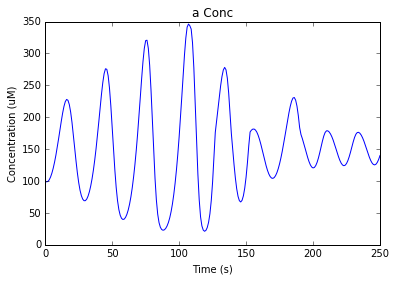

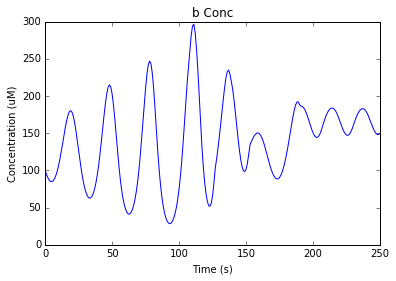

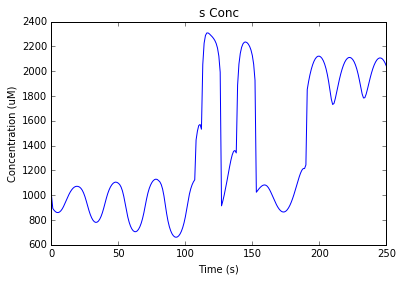

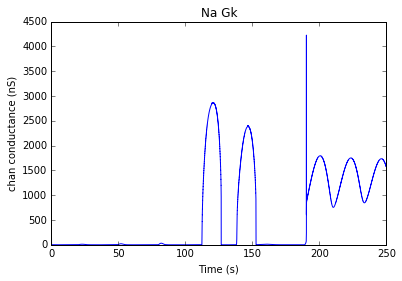

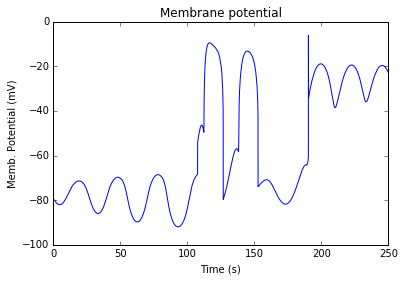

In [1]:
%matplotlib inline
import moose
import pylab
import rdesigneur as rd
rdes = rd.rdesigneur(
	# We want just one compartment so we set diffusion length to be
	# bigger than the 0.5 mm HH axon compartment default. 
    diffusionLength = 1e-3, 
    chanProto = [['make_HH_Na()', 'Na'], ['make_HH_K()', 'K']],
    chanDistrib = [ 
        ['Na', 'soma', 'Gbar', '1200' ], 
        ['K', 'soma', 'Gbar', '360' ]],
    chemProto = [['makeChemOscillator()', 'osc']],
    chemDistrib = [['osc', 'soma', 'install', '1' ]],
	# These adaptor parameters give interesting-looking but not
	# particularly physiological behaviour.
    adaptorList = [
        [ 'dend/a', 'conc', 'Na', 'modulation', 1, -5.0 ],
        [ 'dend/b', 'conc', 'K', 'modulation', 1, -0.2],
        [ 'dend/b', 'conc', '.', 'inject', -1.0e-7, 4e-7 ],
        [ '.', 'Vm', 'dend/s', 'conc', 2.5, 20.0 ]
    ],
    plotList = [['soma', '1', 'dend/a', 'conc', 'a Conc'],
        ['soma', '1', 'dend/b', 'conc', 'b Conc'],
        ['soma', '1', 'dend/s', 'conc', 's Conc'],
        ['soma', '1', 'Na', 'Gk', 'Na Gk'],
        ['soma', '1', '.', 'Vm', 'Membrane potential']
    ]
)
rdes.buildModel()
moose.reinit()
moose.start( 250 ) # Takes a few seconds to run this.
rdes.display()

